In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%reload_ext lab_black

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import ListedColormap
from scipy.stats import pearsonr

In [3]:
# load real data: ./sweep_replay_correlation_realdata.pkl
# !!! need to run SeeepAwakeReplayCorrelation.ipynb first to generate the pickle file if not exist
with open("../../Processed-Data/sweep_replay_correlation_realdata.pkl", "rb") as f:
    (
        animal_names,
        all_sweep_len_perday_concat,
        all_sweep_amp_perday_concat,
        all_sweep_ahead_perday_concat,
        all_sweep_behind_perday_concat,
        all_exponent_perday_concat,
        all_ave_activespeed_perday_concat,
    ) = pickle.load(f)

### plot the relationship between sweep length and running speed, as well as the relationship between replay diffusivity and running speed

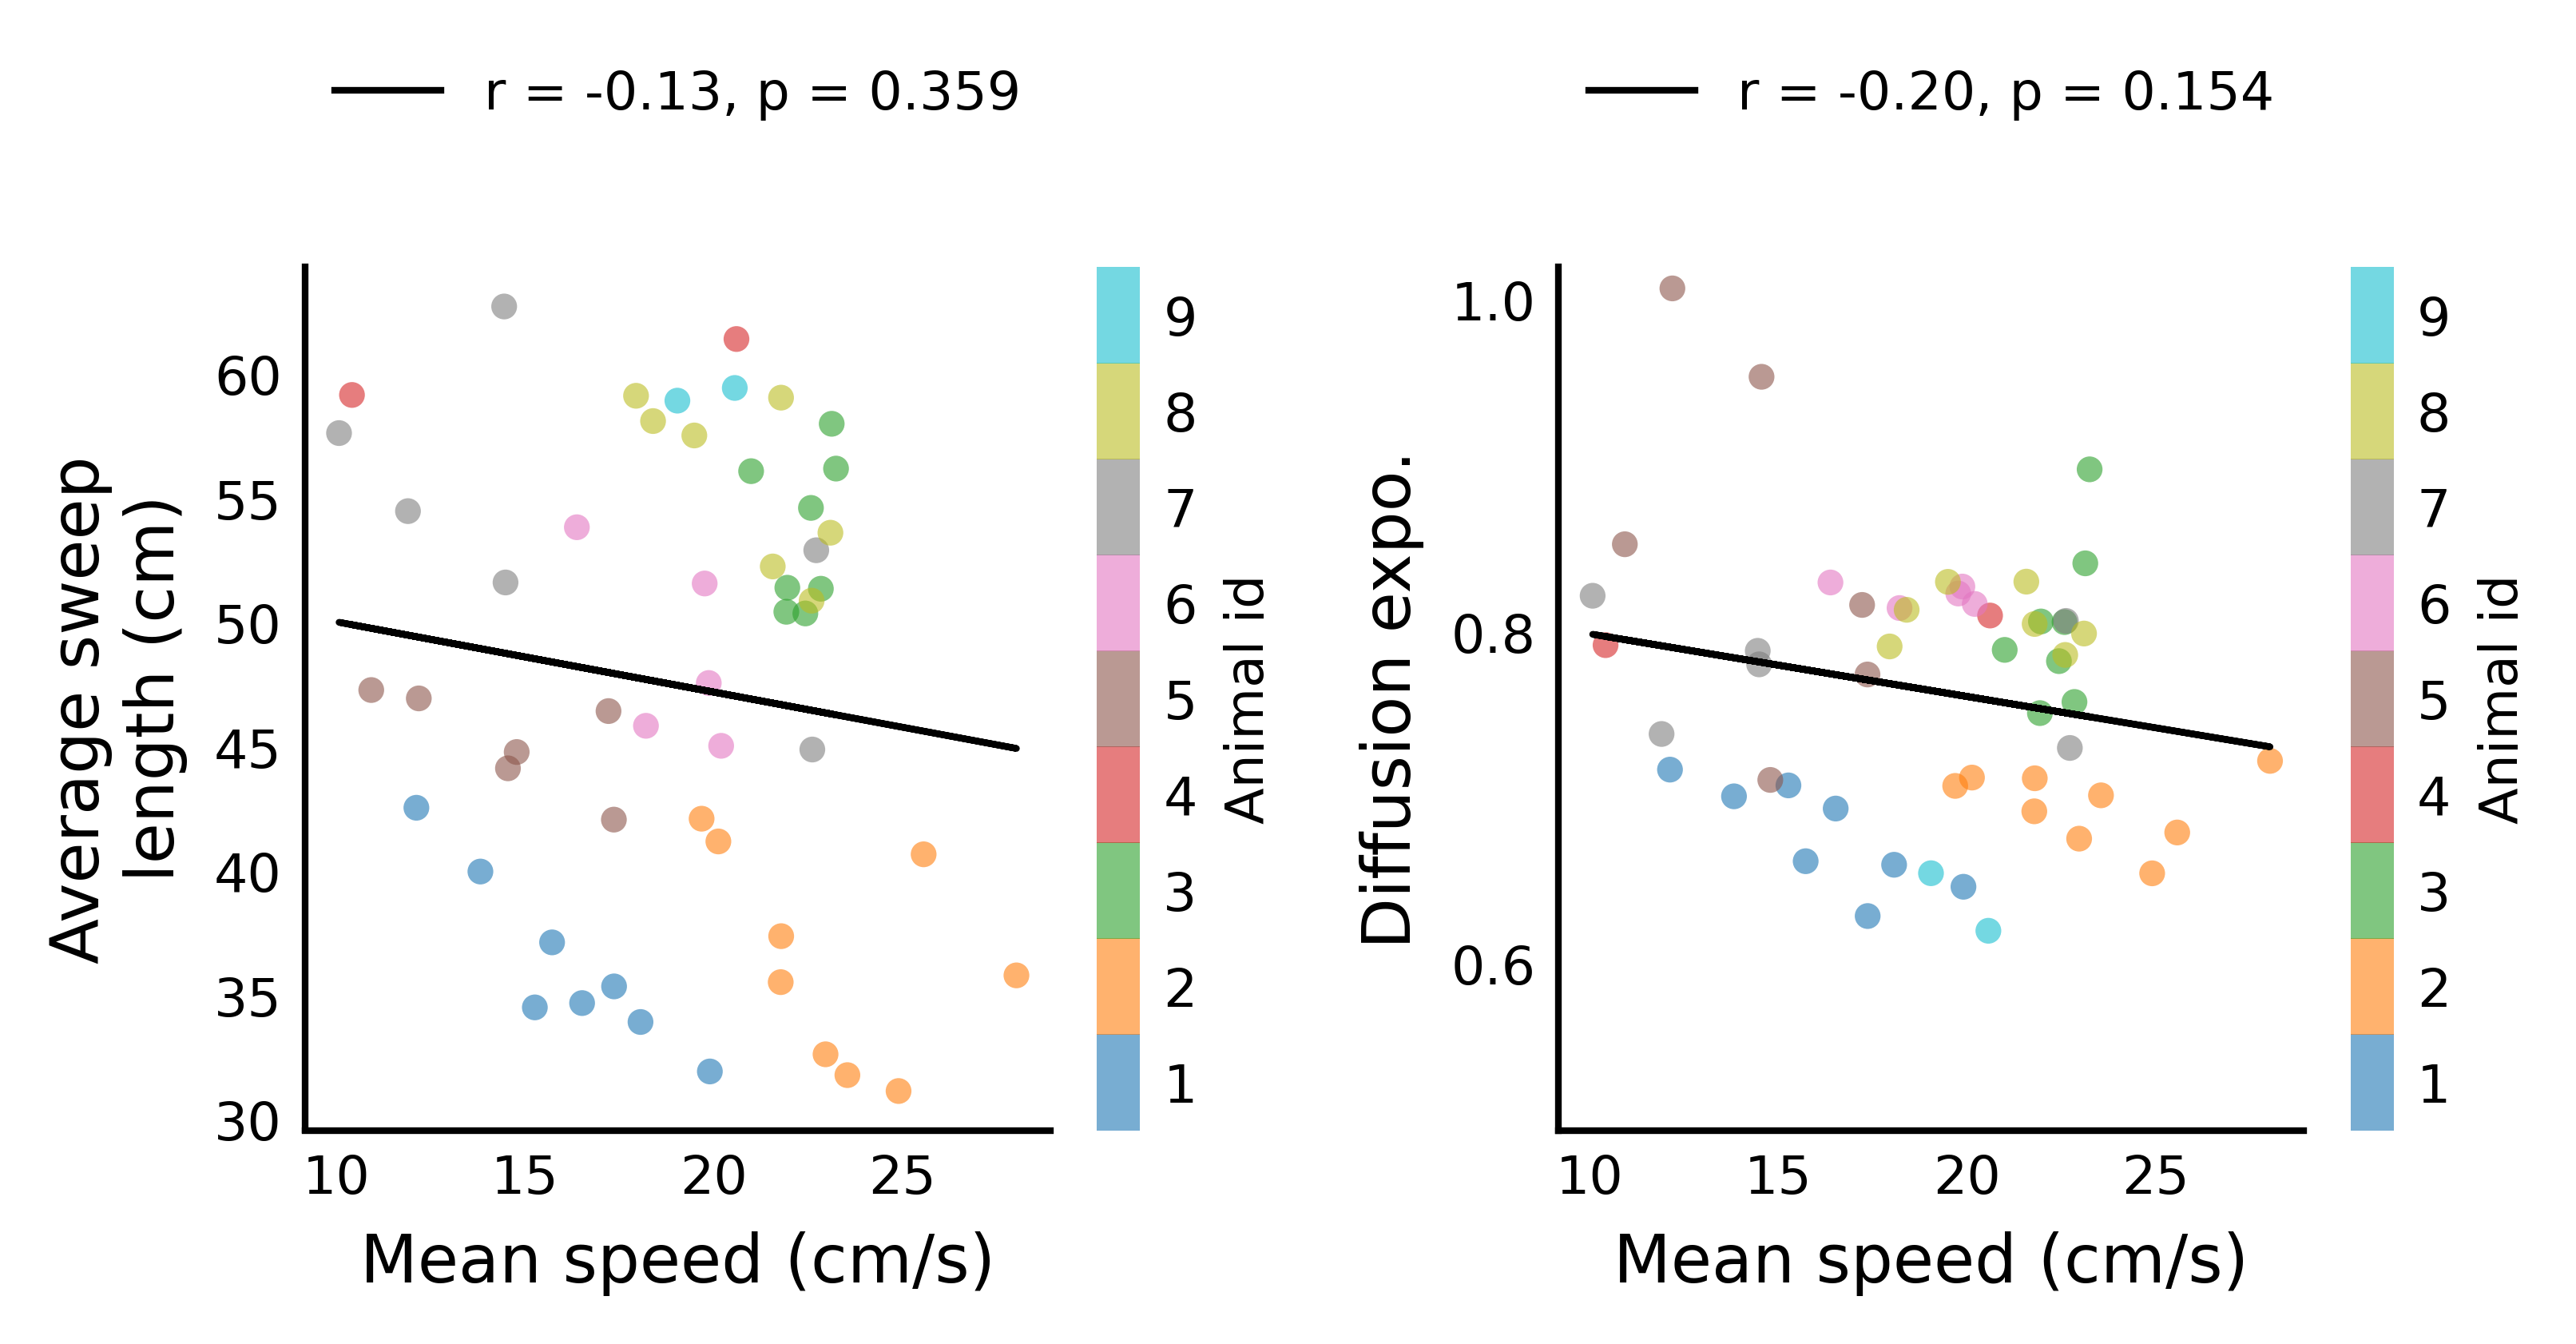

In [4]:
colors = plt.cm.get_cmap("tab10", len(animal_names))
color_dict = {}
for i, name in enumerate(animal_names):
    color_dict[name] = colors(i)

# plot the exponent against average active speed, and intercept against average active speed
plt.figure(figsize=(5.5, 3), dpi=300)
ticksize = 8
labelsize = 10


# plot sweep length against average active speed
ax1 = plt.subplot(1, 2, 1)
# plot all_sweep_amp_perday_concat against all_ave_activespeed_perday_concat
for name in animal_names:
    plt.scatter(
        np.array(all_ave_activespeed_perday_concat[name]),
        np.array(all_sweep_amp_perday_concat[name]),
        s=15,
        alpha=0.6,
        color=color_dict[name],
        edgecolors="none",
    )
# add linear fit line to the plot using numpy.polyfit
# convert all_ave_activespeed_perday_concat and all_sweep_amp_perday_concat to numpy array
sweep_len_np = np.concatenate(list(all_sweep_amp_perday_concat.values()))
speed_np = np.concatenate(list(all_ave_activespeed_perday_concat.values()))
slope, intercept = np.polyfit(speed_np, sweep_len_np, 1)

# pearson test
corr, p = pearsonr(speed_np, sweep_len_np)
# if p<0.001, then add label as 'r = %.2f, p < 0.001'; else add label as 'r = %.2f, p = %.3f'
if p < 0.001:
    ax1.plot(
        speed_np,
        speed_np * slope + intercept,
        "k-",
        label="r = %.2f, p < 0.001" % (corr),
        linewidth=1,
    )
else:
    ax1.plot(
        speed_np,
        speed_np * slope + intercept,
        "k-",
        label="r = %.2f, p = %.3f" % (corr, p),
        linewidth=1,
    )

# legend
ax1.legend(fontsize=ticksize, frameon=False, loc="center", bbox_to_anchor=(0.5, 1.2))

# add colorbar with alpha 0.8
cmap = ListedColormap(color_dict.values())
# Create a ScalarMappable with the colormap and normalize it
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(color_dict)))
# Set the colorbar properties
cbar = plt.colorbar(sm, ax=ax1, ticks=list(range(len(color_dict))), alpha=0.6)
# Set colorbar ticks by adding 1 to each tick
ticks = list(range(len(color_dict)))
cbar.set_ticks([tick + 0.5 for tick in ticks])
# set tick labels by adding 1 to each tick
cbar.set_ticklabels(list(range(1, len(color_dict) + 1)))
# Set colorbar ticklabels by adding 1 to each tick
# Set colorbar label
cbar.set_label("Animal id", fontsize=ticksize)
# remove the box of the colorbar
cbar.outline.set_visible(False)
# set cbar tick size, # remove the short ticks in cbar
cbar.ax.tick_params(labelsize=ticksize, length=0)

ax1.set_xlabel("Mean speed (cm/s)", fontsize=labelsize)
ax1.set_ylabel("Average sweep \n length (cm)", fontsize=labelsize)

ax2 = plt.subplot(1, 2, 2)
# plot all_exponent_perday_concat against all_ave_activespeed_perday_concat
for name in animal_names:
    plt.scatter(
        np.array(all_ave_activespeed_perday_concat[name]),
        np.array(all_exponent_perday_concat[name]),
        s=15,
        alpha=0.6,
        color=color_dict[name],
        edgecolors="none",
    )
# add linear fit line to the plot using numpy.polyfit
# convert all_ave_activespeed_perday_concat and all_exponent_perday_concat to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat.values()))
speed_np = np.concatenate(list(all_ave_activespeed_perday_concat.values()))
slope, intercept = np.polyfit(speed_np, exp_np, 1)

# pearson test
corr, p = pearsonr(speed_np, exp_np)

# if p<0.001, then add label as 'r = %.2f, p < 0.001'; else add label as 'r = %.2f, p = %.3f'
if p < 0.001:
    ax2.plot(
        speed_np,
        speed_np * slope + intercept,
        "k-",
        label="r = %.2f, p < 0.001" % (corr),
        linewidth=1,
    )
else:
    ax2.plot(
        speed_np,
        speed_np * slope + intercept,
        "k-",
        label="r = %.2f, p = %.3f" % (corr, p),
        linewidth=1,
    )

# legend
ax2.legend(fontsize=ticksize, frameon=False, loc="center", bbox_to_anchor=(0.5, 1.2))

# add colorbar with alpha 0.8
cmap = ListedColormap(color_dict.values())
# Create a ScalarMappable with the colormap and normalize it
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(color_dict)))
# Set the colorbar properties
cbar = plt.colorbar(sm, ax=ax2, ticks=list(range(len(color_dict))), alpha=0.6)
# Set colorbar ticks by adding 1 to each tick
ticks = list(range(len(color_dict)))
cbar.set_ticks([tick + 0.5 for tick in ticks])
# set tick labels by adding 1 to each tick
cbar.set_ticklabels(list(range(1, len(color_dict) + 1)))
# Set colorbar ticklabels by adding 1 to each tick
# Set colorbar label
cbar.set_label("Animal id", fontsize=ticksize)
# remove the box of the colorbar
cbar.outline.set_visible(False)
# set cbar tick size, # remove the short ticks in cbar
cbar.ax.tick_params(labelsize=ticksize, length=0)


ax2.set_xlabel("Mean speed (cm/s)", fontsize=labelsize)
ax2.set_ylabel("Diffusion expo.", fontsize=labelsize)
ax2.set_yticks([0.6, 0.8, 1.0])
ax2.set_ylim(0.5, 1.02)


for ax in [ax1, ax2]:
    ax.tick_params(labelsize=ticksize)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    # axis line width 1.0
    ax.spines["bottom"].set_linewidth(1.0)
    ax.spines["left"].set_linewidth(1.0)
    # remove the tick bars on the left and bottom
    ax.tick_params(axis="both", which="both", length=0)

plt.tight_layout()

plt.savefig(
    "../../Processed-Data/Paper_figures/FigS1_correlation_with_runningspeed.pdf",
    bbox_inches="tight",
    dpi=300,
)

### check the relationship between replay diffusivity and different properties of theta sequences

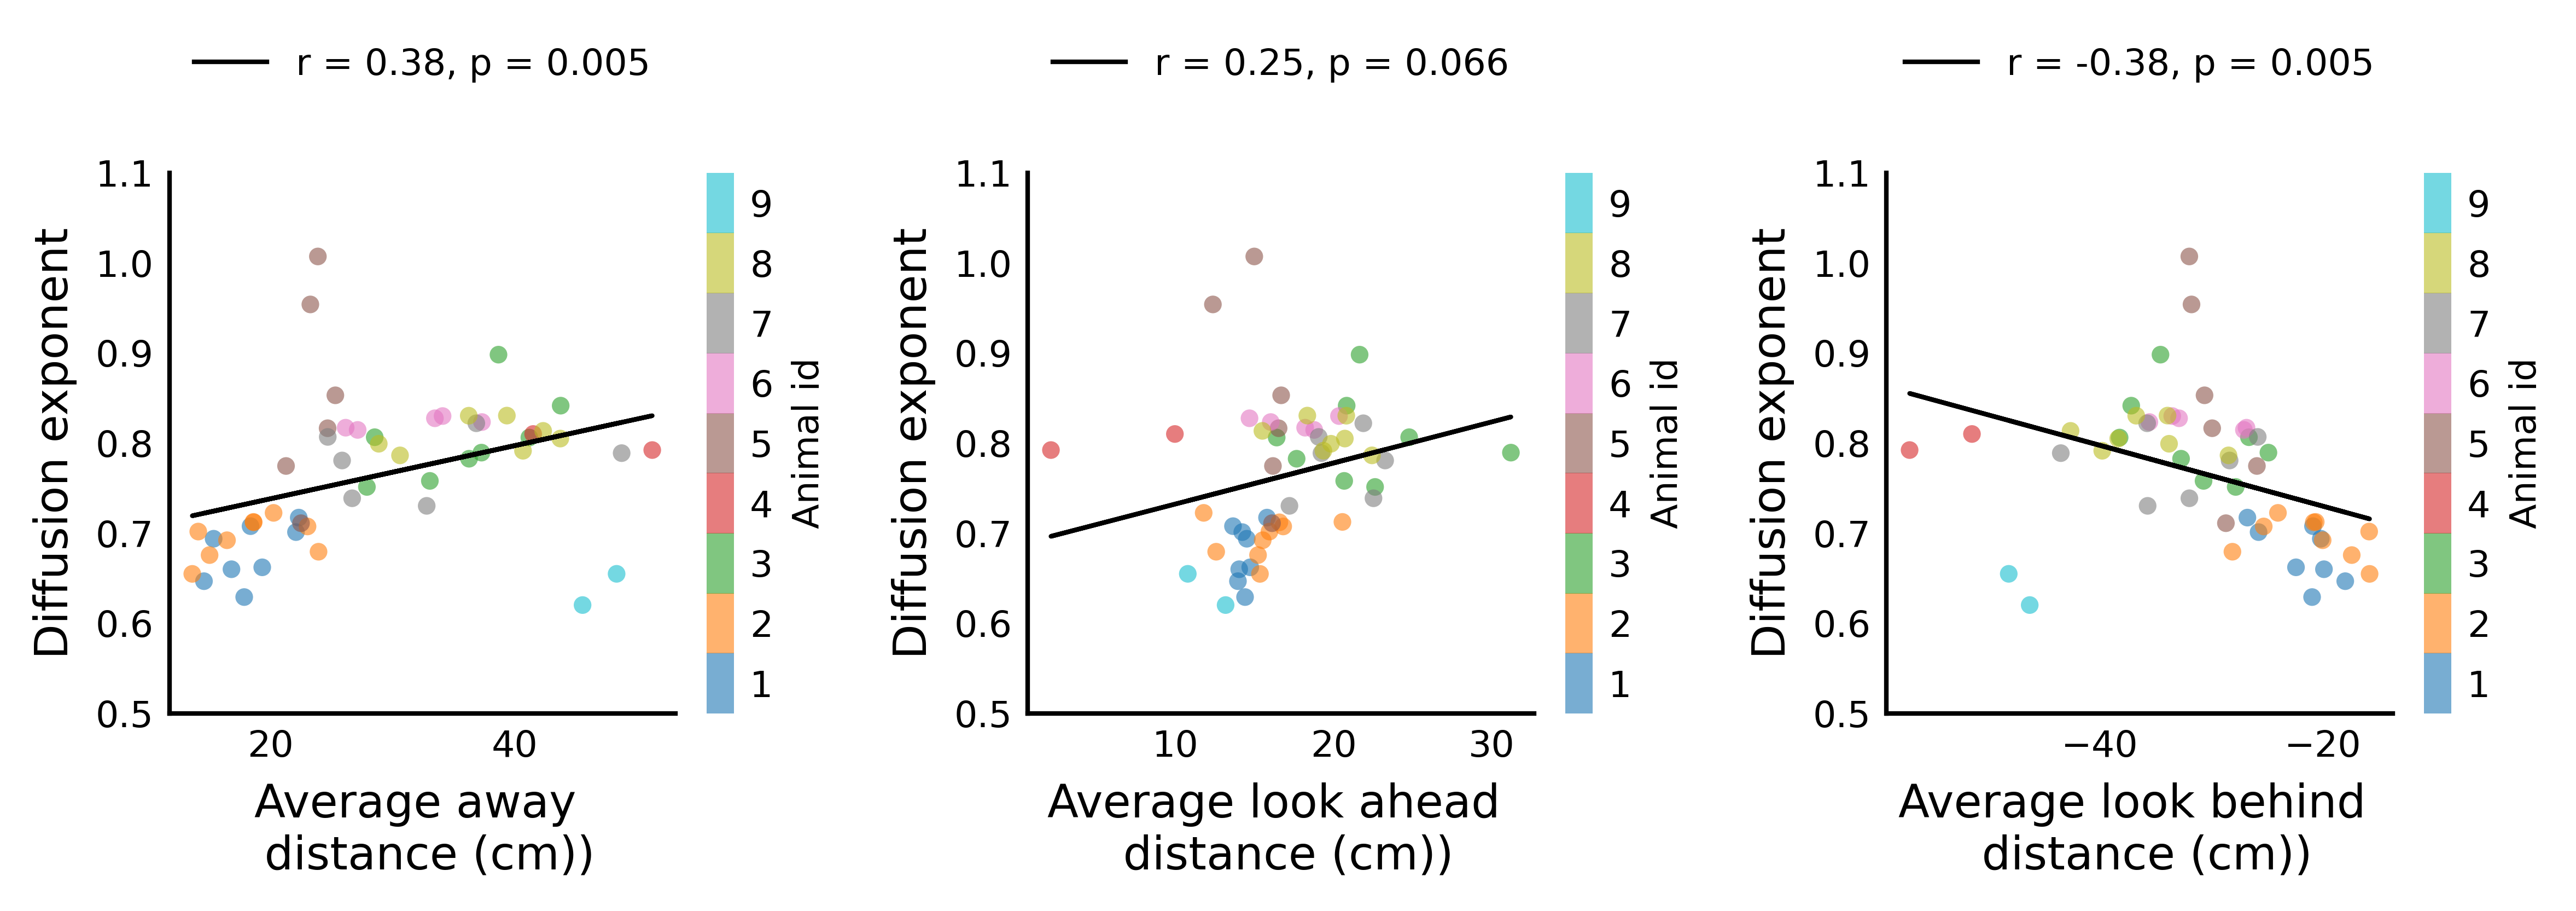

In [5]:
# select colors equals to number of animals from a colormap
# put them in a dictionary with animal names as keys
# delete fra from animal_names

colors = plt.cm.get_cmap("tab10", len(animal_names))
color_dict = {}
for i, name in enumerate(animal_names):
    color_dict[name] = colors(i)

plt.figure(figsize=(8, 3), dpi=300)
ticksize = 8
labelsize = 10

ax1 = plt.subplot(1, 3, 1)
# plot all_exponent_perday_concat against all_sweep_len_perday_concat
for name in animal_names:
    plt.scatter(
        np.array(all_sweep_len_perday_concat[name]),
        np.array(all_exponent_perday_concat[name]),
        s=15,
        alpha=0.6,
        color=color_dict[name],
        edgecolors="none",
    )
# add linear fit line to the plot using numpy.polyfit
# convert all_sweep_len_perday_concat and all_exponent_perday_concat to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat.values()))
sweep_len_np = np.concatenate(list(all_sweep_len_perday_concat.values()))
slope, intercept = np.polyfit(sweep_len_np, exp_np, 1)

# pearson test
corr, p = pearsonr(sweep_len_np, exp_np)

# if p<0.001, then add label as 'r = %.2f, p < 0.001'; else add label as 'r = %.2f, p = %.3f'
if p < 0.001:
    ax1.plot(
        sweep_len_np,
        sweep_len_np * slope + intercept,
        "k-",
        label="r = %.2f, p < 0.001" % (corr),
        linewidth=1,
    )
else:
    ax1.plot(
        sweep_len_np,
        sweep_len_np * slope + intercept,
        "k-",
        label="r = %.2f, p = %.3f" % (corr, p),
        linewidth=1,
    )

# legend
ax1.legend(fontsize=ticksize, frameon=False, loc="center", bbox_to_anchor=(0.5, 1.2))

ax1.set_xlabel("Average away \n distance (cm))", fontsize=labelsize)
ax1.set_ylabel("Diffusion exponent", fontsize=labelsize)
ax1.set_ylim([0.5, 1.1])

# add colorbar with alpha 0.8
cmap = ListedColormap(color_dict.values())
# Create a ScalarMappable with the colormap and normalize it
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(color_dict)))
# Set the colorbar properties
cbar = plt.colorbar(sm, ax=ax1, ticks=list(range(len(color_dict))), alpha=0.6)
# Set colorbar ticks by adding 1 to each tick
ticks = list(range(len(color_dict)))
cbar.set_ticks([tick + 0.5 for tick in ticks])
# set tick labels by adding 1 to each tick
cbar.set_ticklabels(list(range(1, len(color_dict) + 1)))
# Set colorbar ticklabels by adding 1 to each tick
# Set colorbar label
cbar.set_label("Animal id", fontsize=ticksize)
# remove the box of the colorbar
cbar.outline.set_visible(False)
# set cbar tick size, # remove the short ticks in cbar
cbar.ax.tick_params(labelsize=ticksize, length=0)


ax2 = plt.subplot(1, 3, 2)
# plot all_exponent_perday_concat against all_sweep_ahead_perday_concat
for name in animal_names:
    plt.scatter(
        np.array(all_sweep_ahead_perday_concat[name]),
        np.array(all_exponent_perday_concat[name]),
        s=15,
        alpha=0.6,
        color=color_dict[name],
        edgecolors="none",
    )
# add linear fit line to the plot using numpy.polyfit
# convert all_sweep_ahead_perday_concat and all_exponent_perday_concat to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat.values()))
sweep_ahead_np = np.concatenate(list(all_sweep_ahead_perday_concat.values()))
slope, intercept = np.polyfit(sweep_ahead_np, exp_np, 1)
# pearson test
corr, p = pearsonr(sweep_ahead_np, exp_np)

# if p<0.001, then add label as 'r = %.2f, p < 0.001'; else add label as 'r = %.2f, p = %.3f'
if p < 0.001:
    ax2.plot(
        sweep_ahead_np,
        sweep_ahead_np * slope + intercept,
        "k-",
        label="r = %.2f, p < 0.001" % (corr),
        linewidth=1,
    )
else:
    ax2.plot(
        sweep_ahead_np,
        sweep_ahead_np * slope + intercept,
        "k-",
        label="r = %.2f, p = %.3f" % (corr, p),
        linewidth=1,
    )

# legend
ax2.legend(fontsize=ticksize, frameon=False, loc="center", bbox_to_anchor=(0.5, 1.2))

ax2.set_xlabel("Average look ahead \n distance (cm))", fontsize=labelsize)
ax2.set_ylabel("Diffusion exponent", fontsize=labelsize)

ax2.set_ylim([0.5, 1.1])

# add colorbar with alpha 0.8
cmap = ListedColormap(color_dict.values())
# Create a ScalarMappable with the colormap and normalize it
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(color_dict)))
# Set the colorbar properties
cbar = plt.colorbar(sm, ax=ax2, ticks=list(range(len(color_dict))), alpha=0.6)
# Set colorbar ticks by adding 1 to each tick
ticks = list(range(len(color_dict)))
cbar.set_ticks([tick + 0.5 for tick in ticks])
# set tick labels by adding 1 to each tick
cbar.set_ticklabels(list(range(1, len(color_dict) + 1)))
# Set colorbar ticklabels by adding 1 to each tick
# Set colorbar label
cbar.set_label("Animal id", fontsize=ticksize)
# remove the box of the colorbar
cbar.outline.set_visible(False)
# set cbar tick size, # remove the short ticks in cbar
cbar.ax.tick_params(labelsize=ticksize, length=0)

ax3 = plt.subplot(1, 3, 3)
# plot all_exponent_perday_concat against all_sweep_behind_perday_concat
for name in animal_names:
    plt.scatter(
        np.array(all_sweep_behind_perday_concat[name]),
        np.array(all_exponent_perday_concat[name]),
        s=15,
        alpha=0.6,
        color=color_dict[name],
        edgecolors="none",
    )
# add linear fit line to the plot using numpy.polyfit
# convert all_sweep_behind_perday_concat and all_exponent_perday_concat to numpy array
exp_np = np.concatenate(list(all_exponent_perday_concat.values()))
sweep_behind_np = np.concatenate(list(all_sweep_behind_perday_concat.values()))
slope, intercept = np.polyfit(sweep_behind_np, exp_np, 1)
# pearson test
corr, p = pearsonr(sweep_behind_np, exp_np)
if p < 0.001:
    ax3.plot(
        sweep_behind_np,
        sweep_behind_np * slope + intercept,
        "k-",
        label="r = %.2f, p < 0.001" % (corr),
        linewidth=1,
    )
else:
    ax3.plot(
        sweep_behind_np,
        sweep_behind_np * slope + intercept,
        "k-",
        label="r = %.2f, p = %.3f" % (corr, p),
        linewidth=1,
    )

# legend
ax3.legend(fontsize=ticksize, frameon=False, loc="center", bbox_to_anchor=(0.5, 1.2))

ax3.set_xlabel("Average look behind \n distance (cm))", fontsize=labelsize)
ax3.set_ylabel("Diffusion exponent", fontsize=labelsize)
ax3.set_ylim([0.5, 1.1])

# add colorbar with alpha 0.8
cmap = ListedColormap(color_dict.values())
# Create a ScalarMappable with the colormap and normalize it
sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(color_dict)))
# Set the colorbar properties
cbar = plt.colorbar(sm, ax=ax3, ticks=list(range(len(color_dict))), alpha=0.6)
# Set colorbar ticks by adding 1 to each tick
ticks = list(range(len(color_dict)))
cbar.set_ticks([tick + 0.5 for tick in ticks])
# set tick labels by adding 1 to each tick
cbar.set_ticklabels(list(range(1, len(color_dict) + 1)))
# Set colorbar ticklabels by adding 1 to each tick
# Set colorbar label
cbar.set_label("Animal id", fontsize=ticksize)
# remove the box of the colorbar
cbar.outline.set_visible(False)
# set cbar tick size, # remove the short ticks in cbar
cbar.ax.tick_params(labelsize=ticksize, length=0)

for ax in [ax1, ax2, ax3]:
    ax.tick_params(labelsize=ticksize)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    # axis line width 1.0
    ax.spines["bottom"].set_linewidth(1.0)
    ax.spines["left"].set_linewidth(1.0)
    # remove the tick bars on the left and bottom
    ax.tick_params(axis="both", which="both", length=0)

plt.tight_layout()

plt.savefig(
    "../../Processed-Data/Paper_figures/FigS1_diffusivity_with_other_thetasweep_features.pdf",
    bbox_inches="tight",
    dpi=300,
)